In [139]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## Get Data

In [140]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean.csv')
df_kend_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
7628,0.0,0.030769,1.0,0.557692,1.0,0.5,1.0,0.457209,0.932099,0.065744
211329,1.0,0.276923,1.0,0.538462,1.0,0.0,1.0,0.524627,0.154321,0.041522
33951,0.0,0.107692,1.0,0.115385,1.0,0.5,1.0,0.471886,0.932099,0.602076
105592,0.0,0.553846,1.0,0.288462,0.0,0.0,0.0,0.581694,0.154321,0.121107
167317,0.0,0.523077,1.0,0.557692,0.0,1.0,0.0,0.456022,0.154321,0.380623


## Select Attribute for Clustering

C:\Users\user\AppData\Local\Temp/ipykernel_24104/2413644259.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_kend_train.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

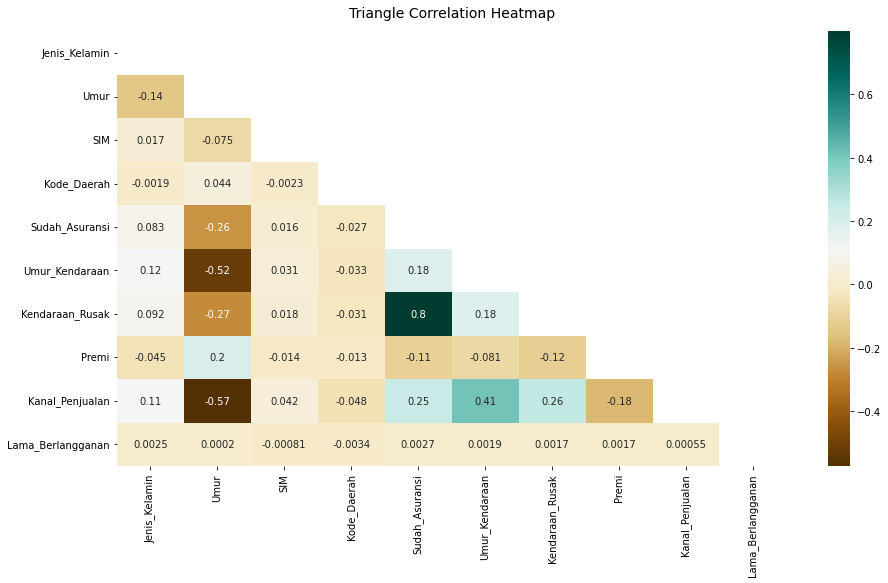

In [141]:
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_kend_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_kend_train.corr(), mask=mask, annot=True, cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 14}, pad=14)

In [142]:
df_kend_train =df_kend_train[['Umur', 'Kanal_Penjualan']]
df = df_kend_train.copy()
df.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.461538,0.537037
4,0.015385,0.932099


In [143]:
print("Total Data", len(df))

Total Data 230625


## Kmeans Function

### Initiate Centroid with Random Value

In [144]:
def initialCentroid(k, df):
  randValue = {i: df[random.randint(0, len(df))] for i in range(k)}
  return randValue

### Calculate Distance Using Euclidean

In [145]:
def calcEuclidean(a, b):
  return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

def calcDist(df, cluster, centroid):
  for row in df:
    dist = [calcEuclidean(row, centroid[cen]) for cen in centroid]
    cluster[dist.index(min(dist))].append(row)
  return cluster

### Set New Centroid

In [146]:
def setCentroid(centroid, clusters):
  for cluster in clusters:
    centroid[cluster]= np.mean(clusters[cluster], axis=0)
  return centroid

### Main Function KMeans

In [147]:
def kMeans(k, df):  
  # centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
  centroid = initialCentroid(k, df)
  print(centroid)
  print(f'Inisialisasi:\n Cluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')

  old_centroid = centroid.copy()
  same = False
  i = 0
  while(same == False):
    cluster = {i: [] for i in range(k)}
    cluster = calcDist(df, cluster, centroid)    
    centroid = setCentroid(centroid, cluster)
    print(f'Iterasi ke {i+1} \n Cluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')
    
    same = False
    for key in cluster.keys():      
      if((old_centroid.get(key) == centroid.get(key))[0]):
        same = True
        break    
    
    old_centroid = centroid.copy()
    i+=1
  return centroid, cluster



## Main

In [148]:
# convert to array agar lebih mudah memprosesnya
data = df.to_numpy()
k = 3

centroid, cluster = kMeans(k, data)

{0: array([0.06153846, 0.93209877]), 1: array([0.04615385, 0.93209877]), 2: array([0.66153846, 0.75925926])}
Inisialisasi:
 Cluster 0: [0.06153846 0.93209877], Cluster 1: [0.04615385 0.93209877], Cluster 2: [0.66153846 0.75925926] 

Iterasi ke 1 
 Cluster 0: [0.15747639 0.87251661], Cluster 1: [0.03009883 0.90419414], Cluster 2: [0.50521631 0.41748336] 

Iterasi ke 2 
 Cluster 0: [0.26702792 0.83866493], Cluster 1: [0.04978696 0.93237776], Cluster 2: [0.51158489 0.30419518] 

Iterasi ke 3 
 Cluster 0: [0.37750312 0.80035732], Cluster 1: [0.0656459  0.92770758], Cluster 2: [0.48952707 0.18845065] 

Iterasi ke 4 
 Cluster 0: [0.42849656 0.78957246], Cluster 1: [0.07542394 0.92078599], Cluster 2: [0.46862137 0.15295618] 

Iterasi ke 5 
 Cluster 0: [0.44301264 0.78636371], Cluster 1: [0.08197852 0.91698006], Cluster 2: [0.46848439 0.15270225] 

Iterasi ke 6 
 Cluster 0: [0.45680563 0.77414276], Cluster 1: [0.09137077 0.91734949], Cluster 2: [0.46848439 0.15270225] 



## Proses Hasil

In [149]:
def convDf(clus):
  df_hasil = []
  # print(cluster.keys())
  for key in clus.keys():
    for c in clus.get(key):
      df_hasil.append((c[0], c[1], key))
  df_hasil = pd.DataFrame(df_hasil)
  df_hasil.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
  return df_hasil

df_hasil = convDf(cluster)
df_hasil.sample(5)

,Umur,Kanal_Penjualan,Cluster
100800,0.076923,0.932099,1
109557,0.123077,0.932099,1
124444,0.123077,0.932099,1
22135,0.230769,0.759259,0
25912,0.738462,0.759259,0


## Visualisasi

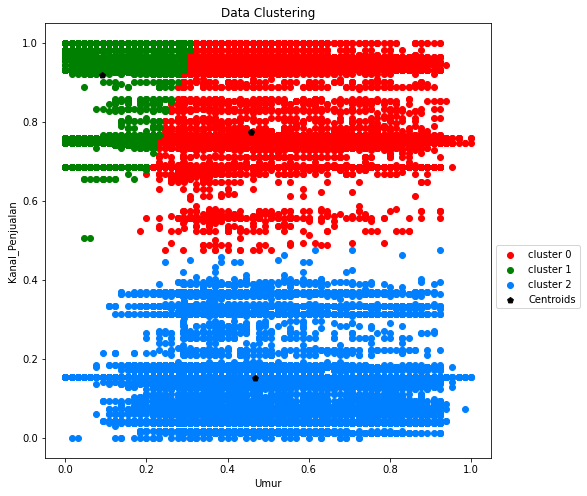

In [150]:
colors = ['r', 'g', '#0080FF', '#e69500', '#e89500']

plt.figure(figsize=(8,8))
plt.title('Data Clustering')

for i in range(k):
  plt.scatter(
    df_hasil['Umur'][df_hasil['Cluster'] == i],
    df_hasil['Kanal_Penjualan'][df_hasil['Cluster'] == i],
    color=colors[i],
    label=f'cluster {i}'
  )

  plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p')

plt.scatter(centroid[0][0], centroid[0][1], color='k', label='Centroids', marker='p')

plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## Evaluasi Model

### Elbow Method

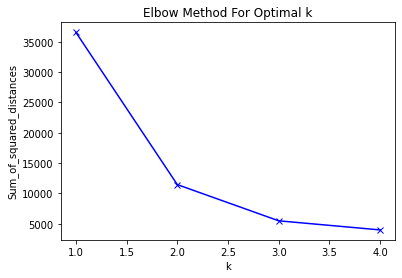

In [151]:
# # Menentukan nilai SSE terlebih dahulu
# def sse(df,centroid):
#   sum = 0
#   for i in range(len(centroid)):
#     j = i+1
    
#     k = df[(df['Cluster'] == j)]['{}'.format(j)]**2
#     sum += k.sum()
#   return sum

# # Menentukan nilai WCSS
# wcss = []
# data = df.to_numpy()
# for i in range(1,2): 
#   centroid, cluster = kMeans(i+1, 12, data)
#   df_hasil = convDf(cluster)
#   print(df_hasil.sample(5))
#   wcss.append(sse(df_hasil, centroid))
#   print('K=',i+1,'| Distortion: ',wcss[i])

# # Visualization
# plt.plot(range(1, 6), wcss, '-bx')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

SS_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SS_distances.append(km.inertia_)

plt.plot(K, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()